In [1]:
# Import required libraries
from imdclient.IMDREADER import IMDReader
import MDAnalysis as mda
import logging
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
import numpy as np
import matplotlib.pyplot as plt
import threading
import time
from IPython.display import display

NAMD_TOPOL = "../exec-files/T3_MNN.psf"

# Set up logging
logger = logging.getLogger("imdclient.IMDClient")
file_handler = logging.FileHandler("imdreader.log")
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)
logger.setLevel(logging.INFO)

In [5]:
# Function to update the plot dynamically
def update_plot(x_data, y_data):
    """
    Update the plot with new data.

    Args:
        x_data (list): Frame numbers.
        y_data (list): Distances between Atom 1 and Atom 3.
    """
    line.set_data(x_data, y_data)  # Efficiently update the line with all data
    # ax.set_xlim(0, max(5000,max(x_data)))  # Adjust X-axis dynamically
    fig.canvas.draw_idle()  # Efficient redraw
    # ax.draw_artist(line)
    # fig.canvas.blit(ax.bbox)

# Function to compute distances and update the plot
def read_and_plot(update_frequency=100):
    x_data = np.zeros(8000) #np.array([])  # Use NumPy arrays
    y_data = np.zeros(8000) #np.array([])

    frame_count = 0
    for ts in u.trajectory:
        # Compute distance and append data
        distance = np.linalg.norm(ts.positions[0] - ts.positions[99])
        x_data[frame_count] = frame_count + 1
        y_data[frame_count] = distance
        frame_count += 1

        # Update the plot periodically
        if frame_count % update_frequency == 0:
            logger.info(f"Updating plot at frame {frame_count}.")
            update_plot(x_data[:frame_count], y_data[:frame_count])

    logger.info(f"Processed {frame_count} frames.")

# Thread function to process trajectory data
def start_thread(update_frequency=100):
    """
    Start a thread for reading trajectory and updating the plot.

    Args:
        update_frequency (int): Number of frames to process before updating the plot.
    """
    data_thread = threading.Thread(target=read_and_plot, args=(update_frequency,))
    data_thread.daemon = True  # Thread exits when main program ends
    data_thread.start()

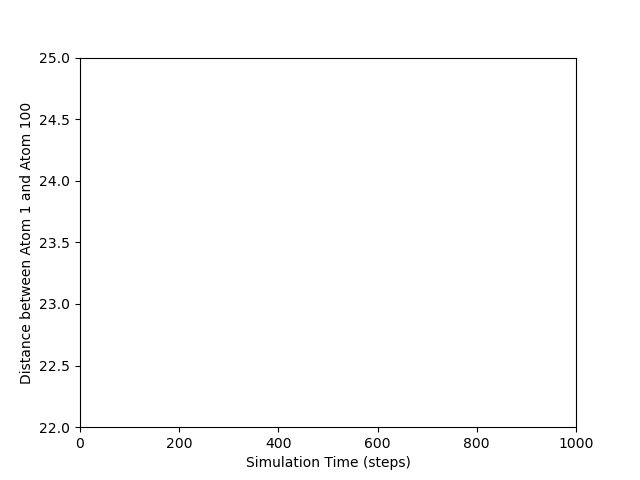

In [9]:
# Initialize MDAnalysis Universe
u = mda.Universe(NAMD_TOPOL, "imd://localhost:1025")

# Enable interactive plotting
%matplotlib widget
plt.ion()

# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)  # Line for dynamic updates
ax.set_xlim(0, 1000)  # Adjust as necessary
ax.set_ylim(22, 25)  # Adjust based on expected distance range
ax.set_xlabel("Simulation Time (steps)")
ax.set_ylabel("Distance between Atom 1 and Atom 100")

# Display the plot
# display(fig)

# Start the processing thread
start_thread(update_frequency=1)  # Update the plot every few frames